In [1]:
# Imports

import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk

In [2]:
# Load data set, set cmap
data = pd.read_csv("marital_satisfaction_data_wrangled_final.csv")
data.describe()

,Unnamed: 0,sex,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religion,religiosity,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,3588.500000,1.533157,40.664948,14.753970,1.766648,1.466982,4.242965,0.385205,15.930621,4.037197,...,1.772081,1.718167,1.507662,2.013514,0.452912,1.316801,1.807746,2.114517,0.601560,1.010588
std,2072.254449,0.498934,11.446839,11.594163,1.307748,1.383066,0.949635,0.831985,108.304417,1.777629,...,1.460221,1.494538,1.460362,1.430655,1.819215,1.766169,1.529274,1.470525,1.959335,1.922027
min,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,1.000000,1.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,1794.250000,1.000000,32.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,2.000000,-1.000000,1.000000,1.000000,2.000000,-1.000000,0.000000
50%,3588.500000,2.000000,39.000000,12.000000,2.000000,1.000000,5.000000,0.000000,4.000000,4.000000,...,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000
75%,5382.750000,2.000000,49.000000,23.000000,2.000000,2.000000,5.000000,1.000000,6.000000,5.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000
max,7177.000000,2.000000,88.000000,70.000000,12.000000,13.000000,5.000000,2.000000,999.000000,7.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [3]:
data.columns
data = data.drop(['Unnamed: 0'], axis=1)

Text(0.5, 1.0, 'Country Participants by Gender')

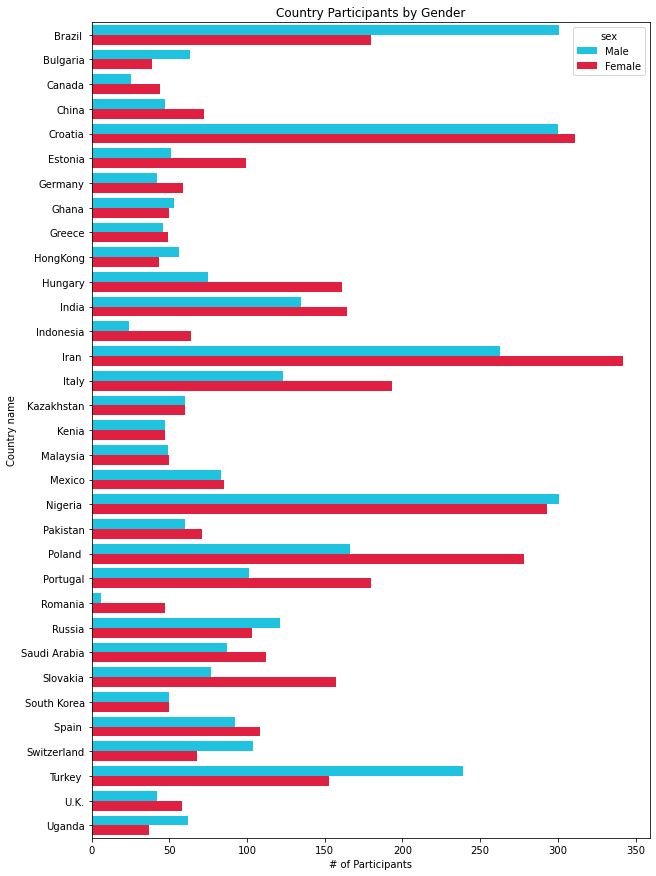

In [4]:
# Nationality of participant

data_demo = pd.DataFrame(data[['country', 'sex', 'age', 'edu_level', 'religion', 'marital_satisfaction']])
fig, heat = plt.subplots(figsize = (10,15))
data_demo['sex'] = data_demo['sex'].replace({1:"Male",2:"Female"})
sns.countplot(y='country', hue='sex', data=data_demo, palette = ['#00D9FF', '#FF002B'])
plt.xlabel('# of Participants')
plt.ylabel('Country name')
plt.title('Country Participants by Gender')

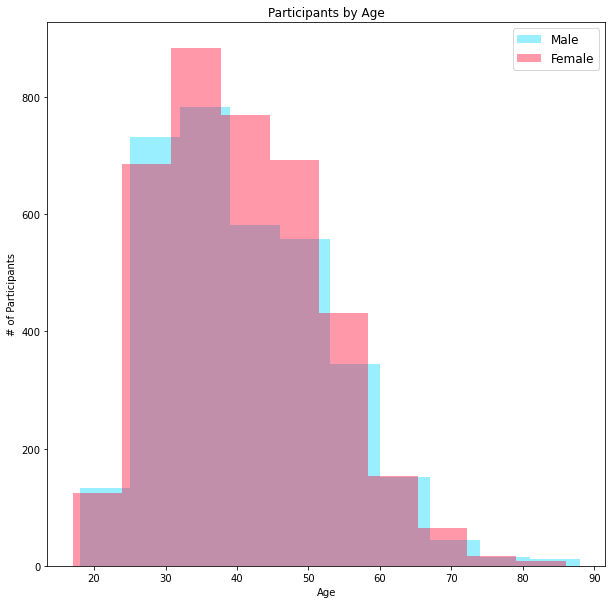

In [5]:
# Start with histograms of age by gender

fig, heat = plt.subplots(figsize = (10,10))
ddm = data_demo[data_demo.sex == 'Male']
sns.distplot(ddm['age'], bins=10, label='Male', color='#00D9FF', kde=False)
ddf = data_demo[data_demo.sex == 'Female']
sns.distplot(ddf['age'], bins=10, label='Female', color='#FF002B', kde=False)
plt.xlabel('Age')
plt.ylabel('# of Participants')
plt.title('Participants by Age')
plt.legend(prop={'size':12})

Text(0.5, 1.0, 'Religion by Gender')

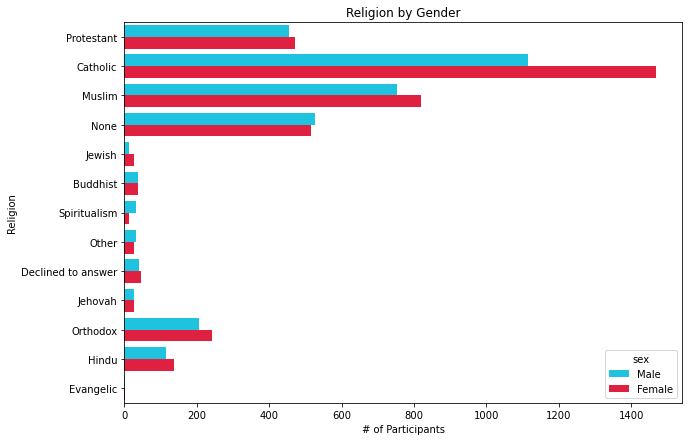

In [6]:
# Religion of participant

fig, heat = plt.subplots(figsize = (10,7))
data_demo['religion'] = data_demo['religion'].replace({1:"Protestant",2:"Catholic",3:"Jewish",4:"Muslim",5:"Buddhist",6:"None",7:"Jehovah",8:"Evangelic",9:"Spiritualism",10:"Other",11:"Orthodox",12:"Hindu",999:"Declined to answer"})
sns.countplot(y='religion', hue='sex', data=data_demo, palette = ['#00D9FF', '#FF002B'])
plt.xlabel('# of Participants')
plt.ylabel('Religion')
plt.title('Religion by Gender')

Text(0.5, 1.0, 'Country Participants by Gender')

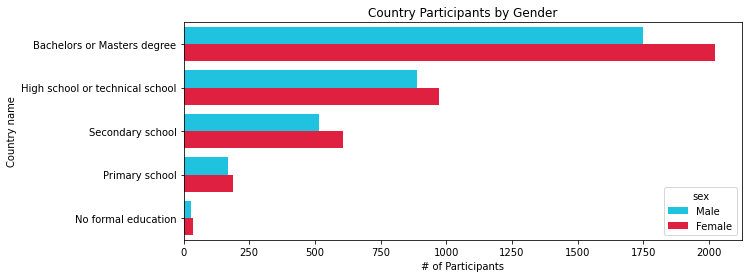

In [7]:
# Education level of participant

fig, heat = plt.subplots(figsize = (10,4))
data_demo['edu_level'] = data_demo['edu_level'].replace({1:"No formal education",2:"Primary school",3:"Secondary school",4:"High school or technical school",5:"Bachelors or Masters degree"})
sns.countplot(y='edu_level', hue='sex', data=data_demo, palette = ['#00D9FF', '#FF002B'])
plt.xlabel('# of Participants')
plt.ylabel('Country name')
plt.title('Country Participants by Gender')

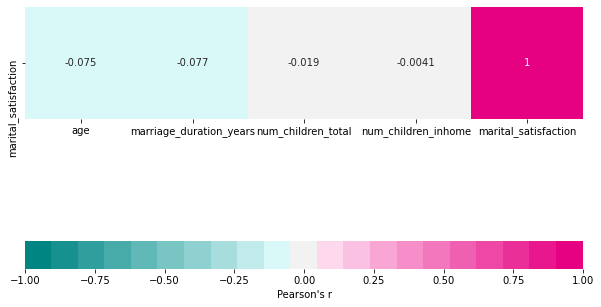

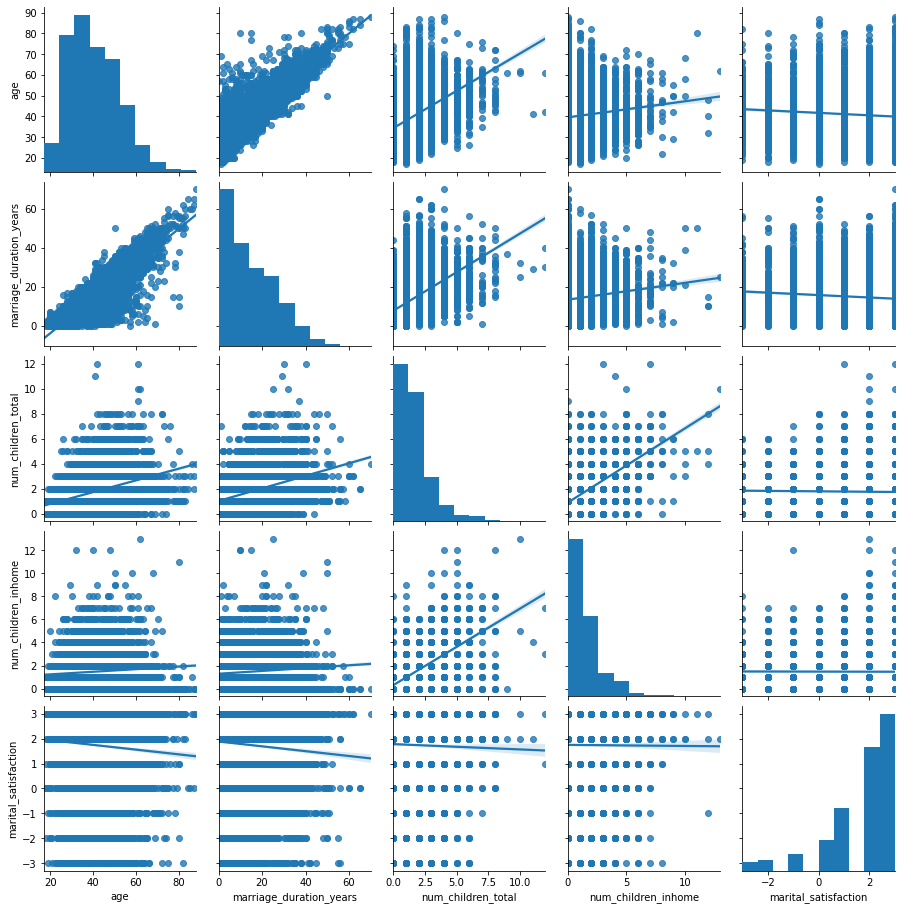

In [8]:
# Correlation heatmap first for continuous data
# Regression plots with histograms for continuous data

hm_data = pd.DataFrame(data[['age', 'marriage_duration_years', 'num_children_total', 'num_children_inhome', 'marital_satisfaction']])
fig, heat = plt.subplots(figsize = (10,15))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, s=100, l=50, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_cont_hm.png')

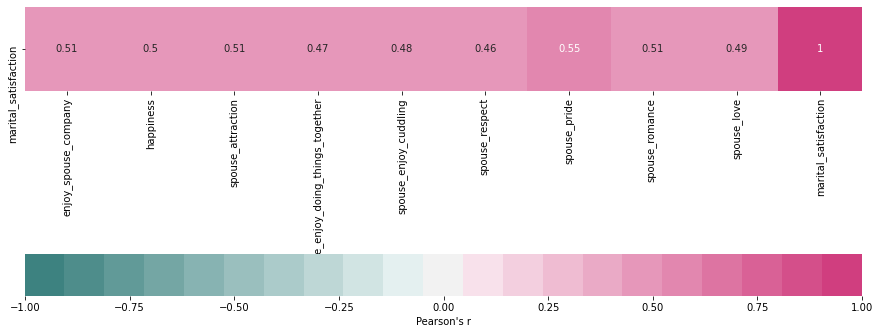

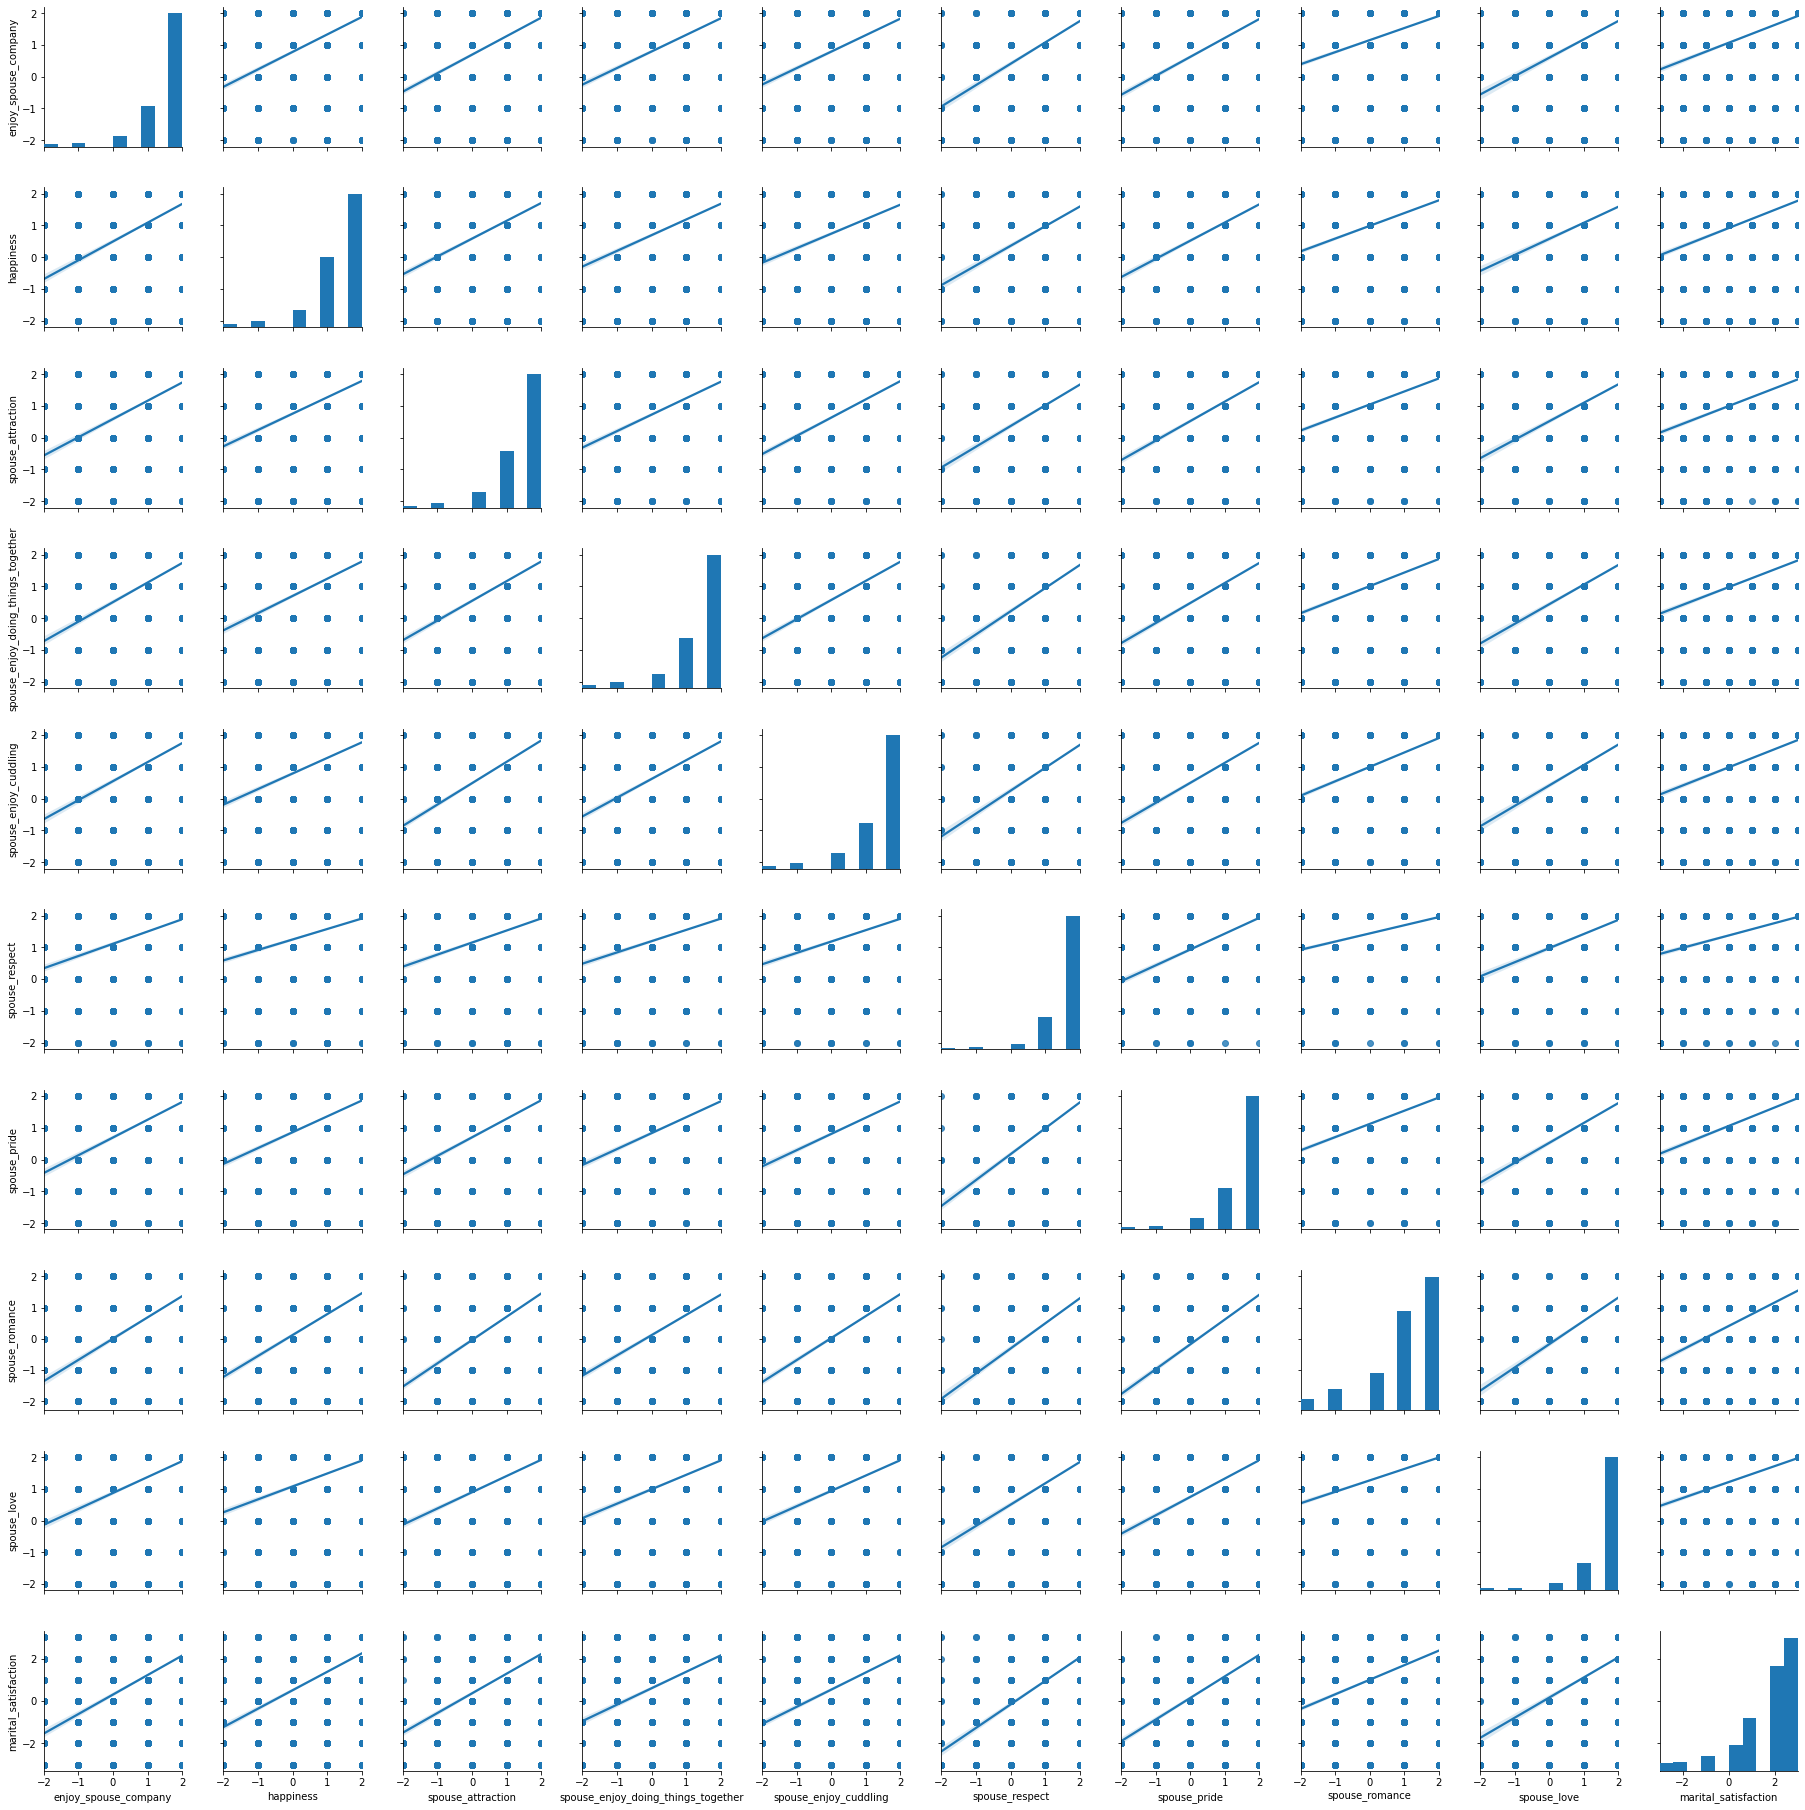

In [9]:
# Correlation heatmap for marriage and relationship questionnaire
# Regression plots with histograms for MRQ

hm_data = data[['enjoy_spouse_company', 'happiness', 'spouse_attraction', 'spouse_enjoy_doing_things_together', 'spouse_enjoy_cuddling', 'spouse_respect', 'spouse_pride', 'spouse_romance', 'spouse_love', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (15,20))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_mrq_hm.png')

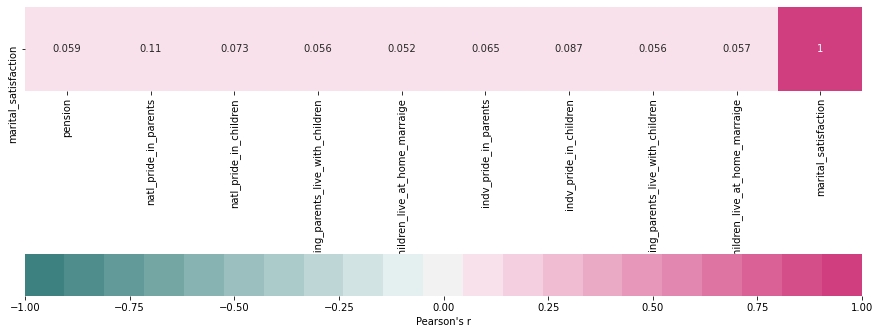

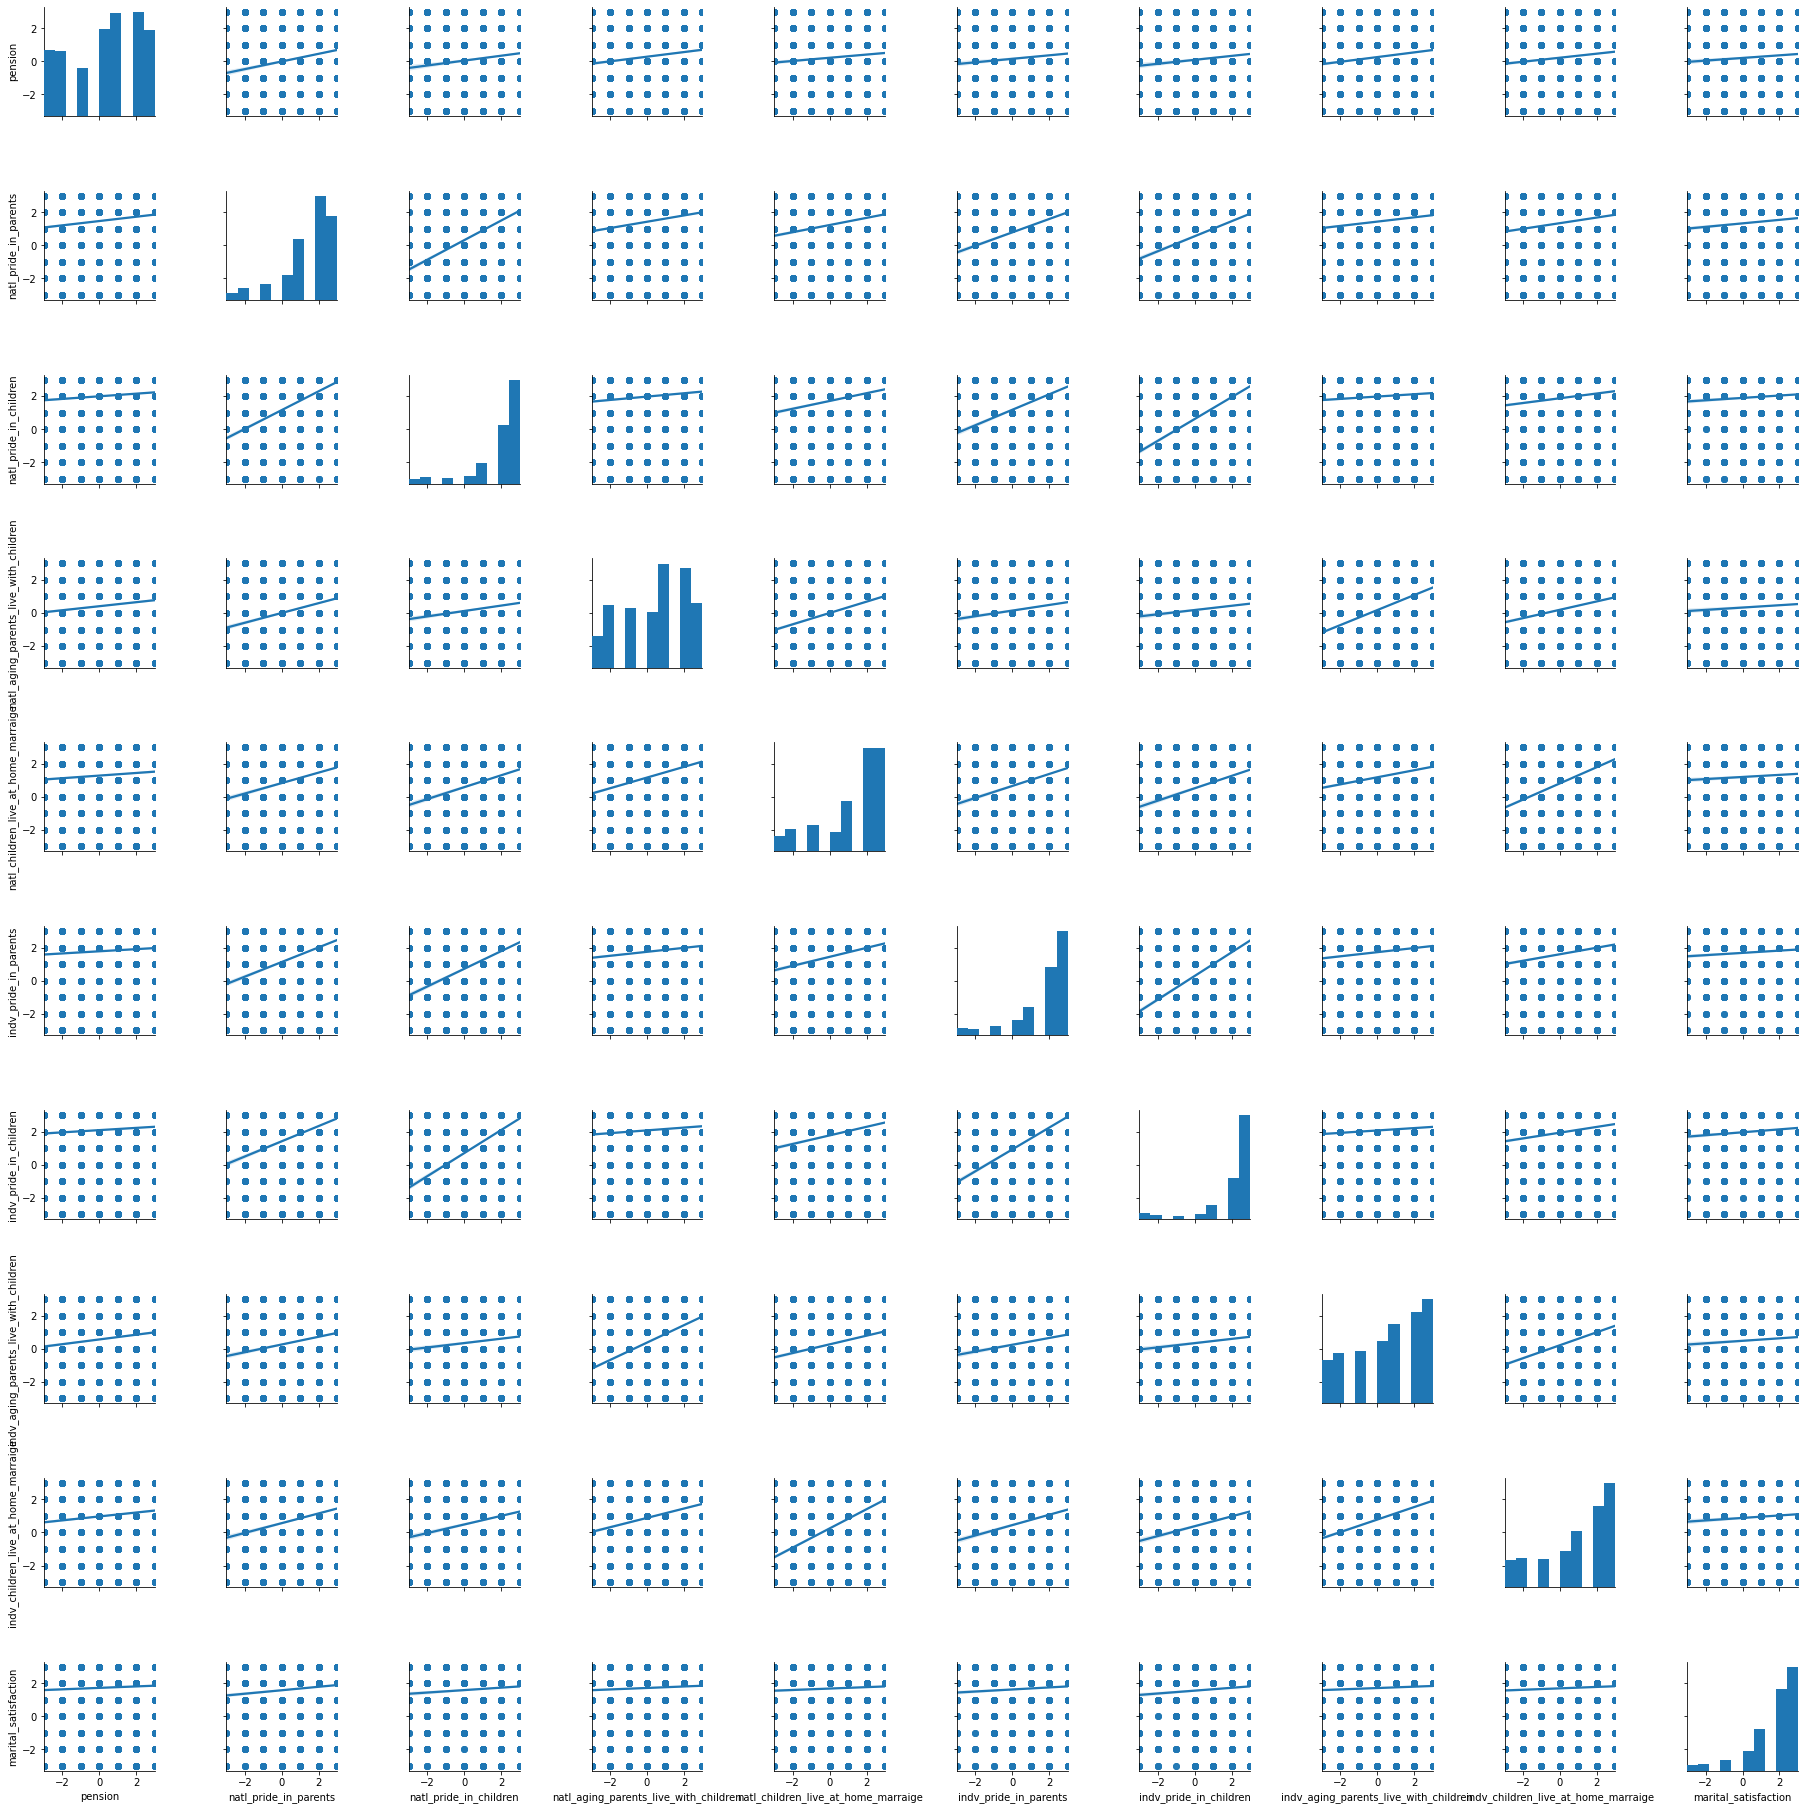

In [10]:
# Correlation heatmap first for global survey
# Regression plots and histograms for global survey

hm_data = data[['pension','natl_pride_in_parents','natl_pride_in_children','natl_aging_parents_live_with_children','natl_children_live_at_home_marraige','indv_pride_in_parents','indv_pride_in_children','indv_aging_parents_live_with_children','indv_children_live_at_home_marraige', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (15,20))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_gs_hm.png')

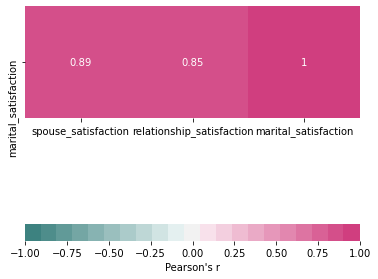

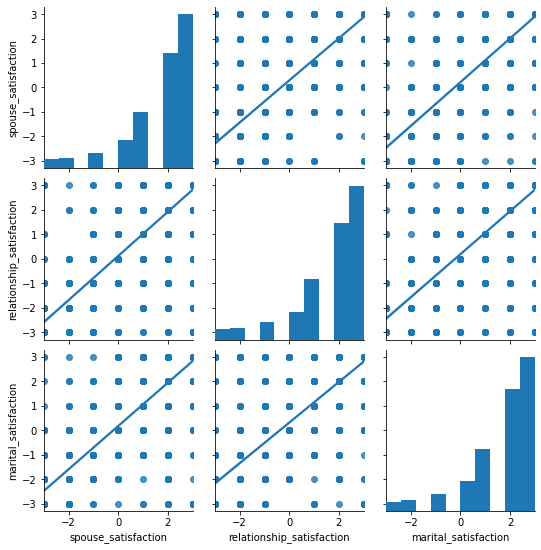

In [11]:
# Correlation heatmap for marital satisfaction questionnaire
# Regression plots and histograms for MSQ

hm_data = data[['spouse_satisfaction','relationship_satisfaction', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (6,13))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
sns.pairplot(hm_data, kind='reg')
plt.xticks(rotation = 45)
plt.savefig('marsat_marsat_hm.png')

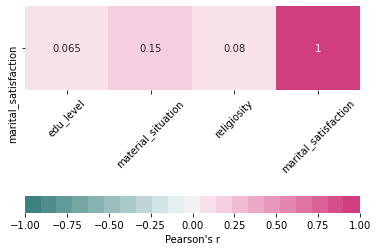

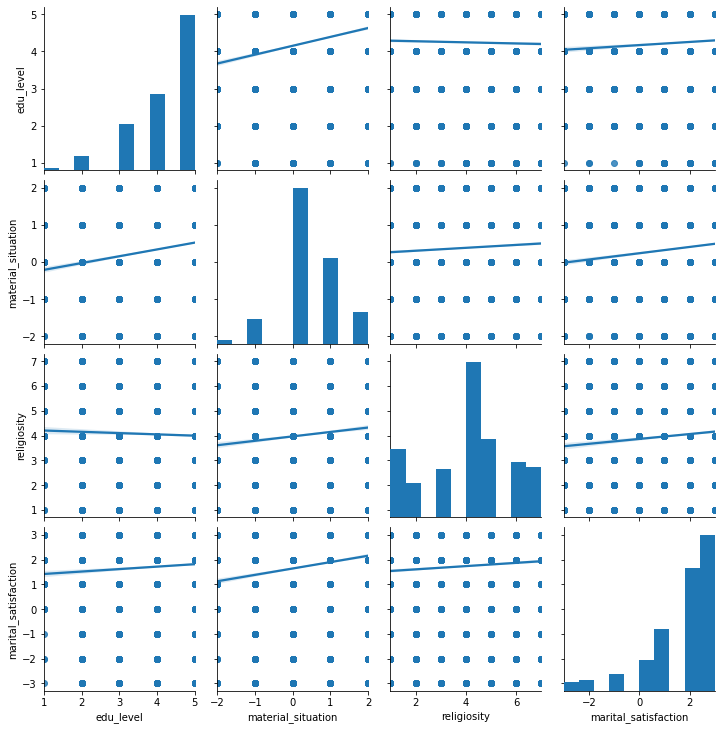

In [12]:
# Correlation heatmap for misc categories
# Regression plots and histograms for misc

hm_data = data[['edu_level', 'material_situation','religiosity', 'marital_satisfaction']]
fig, heat = plt.subplots(figsize = (6,13))
sns.heatmap(hm_data.corr().loc[['marital_satisfaction'], :], square=True, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(189, 350, n=21), cbar_kws={'label': "Pearson's r", "orientation":"horizontal"})
plt.xticks(rotation = 45)
sns.pairplot(hm_data, kind='reg')
plt.savefig('marsat_misc_hm.png')

In [13]:
data_stackbar = pd.DataFrame(data)

In [14]:
mrq_dict = {-2:"No",-1:"Rather no",0:"Neither yes or no",1:"Rather yes",2:"Yes"}
mrq_cols = list(data_stackbar[['enjoy_spouse_company', 'happiness', 'spouse_attraction',
       'spouse_enjoy_doing_things_together', 'spouse_enjoy_cuddling',
       'spouse_respect', 'spouse_pride', 'spouse_romance', 'spouse_love']])
mrq_order = ["No", "Rather no","Neither yes or no","Rather yes","Yes"]
mrq_responses = ["No", "Rather no","Neither yes or no","Rather yes","Yes"]
data_stackbar[mrq_cols] = data_stackbar[mrq_cols].replace(mrq_dict)
globe_survey_dict = {3:"Strongly Agree",2:"Somewhat Agree",1:"Slightly Agree",0:"Neither Agree nor Disagree",-1:"Slightly Disagree",-2:"Somewhat Disagree",-3:"Strongly Disagree"}
globe_survey_cols = list(data_stackbar[['pension', 'natl_pride_in_parents',
       'natl_pride_in_children', 'natl_aging_parents_live_with_children',
       'natl_children_live_at_home_marraige', 'indv_pride_in_parents',
       'indv_pride_in_children', 'indv_aging_parents_live_with_children',
       'indv_children_live_at_home_marraige']])
gs_order = ["Strongly Disagree","Somewhat Disagree","Slightly Disagree","Neither Agree nor Disagree","Slightly Agree","Somewhat Agree","Strongly Agree"]
gs_responses = ["Strongly Disagree","Somewhat Disagree","Slightly Disagree","Neither Agree nor Disagree","Slightly Agree","Somewhat Agree","Strongly Agree"]
data_stackbar[globe_survey_cols] = data_stackbar[globe_survey_cols].replace(globe_survey_dict)
marsat_dict = {-3:"Very Dissatisfied",-2:"Somewhat Dissatisfied",-1:"Slightly Dissatisfied",0:"Neutral",1:"Slightly Satisfied",2:"Somewhat Satisfied",3:"Very Satisfied"}
marsat_cols = list(data_stackbar[['marital_satisfaction', 'spouse_satisfaction',
       'relationship_satisfaction']])
marsat_order = ['Very Dissatisfied', "Somewhat Dissatisfied", "Slightly Dissatisfied", "Neutral", "Slightly Satisfied", "Somewhat Satisfied", "Very Satisfied"]
marsat_responses = ['Very Dissatisfied', "Somewhat Dissatisfied", "Slightly Dissatisfied", "Neutral", "Slightly Satisfied", "Somewhat Satisfied", "Very Satisfied"]
data_stackbar[marsat_cols] = data_stackbar[marsat_cols].replace(marsat_dict)

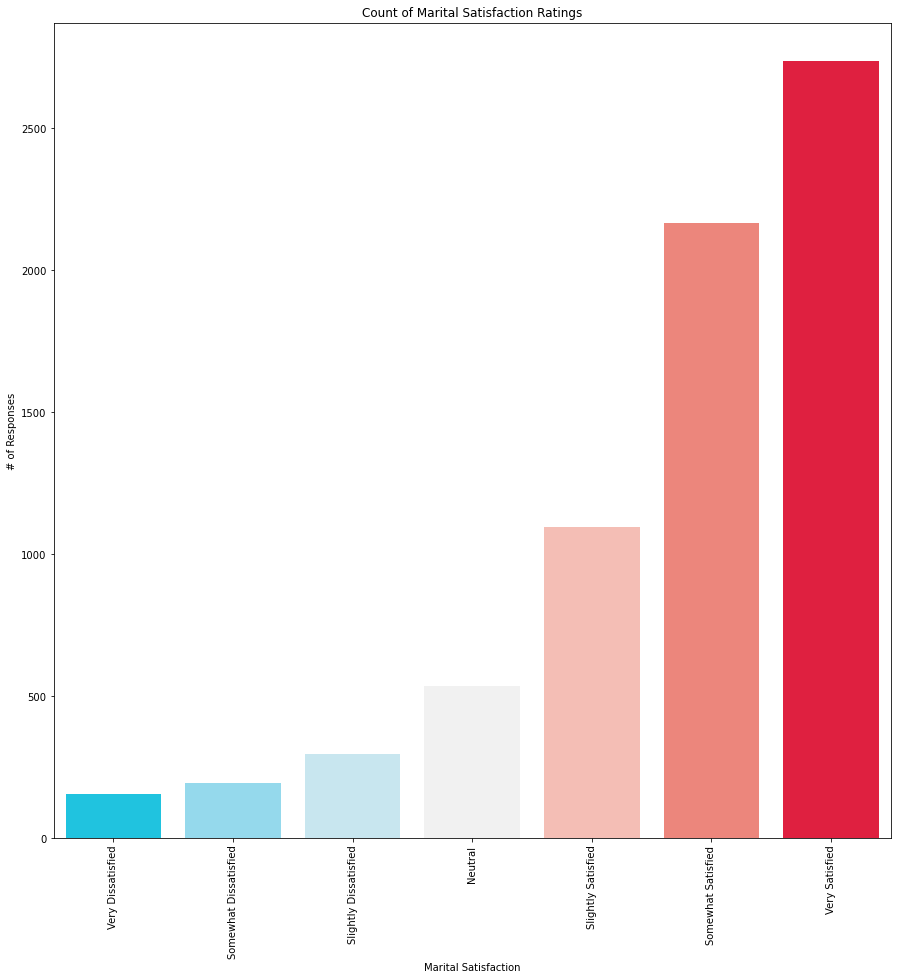

In [15]:
# Univariate chart of target
fig, hist = plt.subplots(figsize = (15,15))
sns.countplot(data_stackbar['marital_satisfaction'], order=marsat_responses, palette=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Count of Marital Satisfaction Ratings')
plt.xticks(rotation=90)
plt.savefig('dv_marsat.png')


Chi-square for Marital Satisfaction by Sex:
p: 1.590819615057286e-08
chi2: 47.35327815759295
DoF: 6
sex                      Female      Male
marital_satisfaction                     
Very Dissatisfied      0.705128  0.294872
Somewhat Dissatisfied  0.580311  0.419689
Slightly Dissatisfied  0.591216  0.408784
Neutral                0.585821  0.414179
Slightly Satisfied     0.547445  0.452555
Somewhat Satisfied     0.536721  0.463279
Very Satisfied         0.494883  0.505117


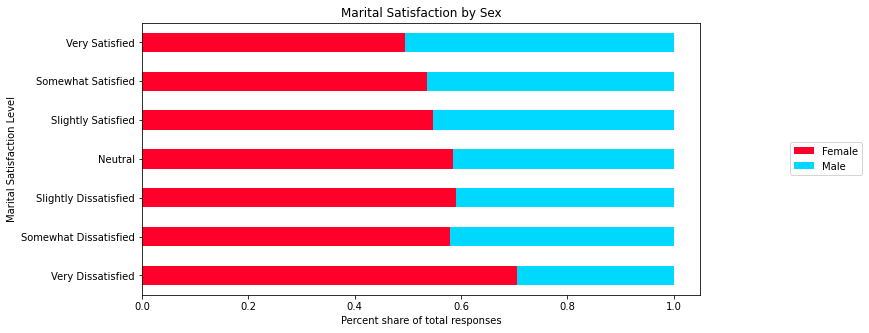

In [16]:
# Nationality of participant

data_stackbar['sex'] = data_stackbar['sex'].replace({1:"Male",2:"Female"})
df = data_stackbar[['marital_satisfaction','sex']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','sex']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['marital_satisfaction'], df['sex'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_demo['marital_satisfaction'], data_demo['sex'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)

print("")
print("Chi-square for Marital Satisfaction by Sex:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df = df.reindex(marsat_order, axis='rows')
print(df)
df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#ff002b','#00d9ff'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Sex')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 


Chi-square for Marital Satisfaction by Country:
p: 2.110375153784915e-73
chi2: 789.4606527949185
DoF: 192


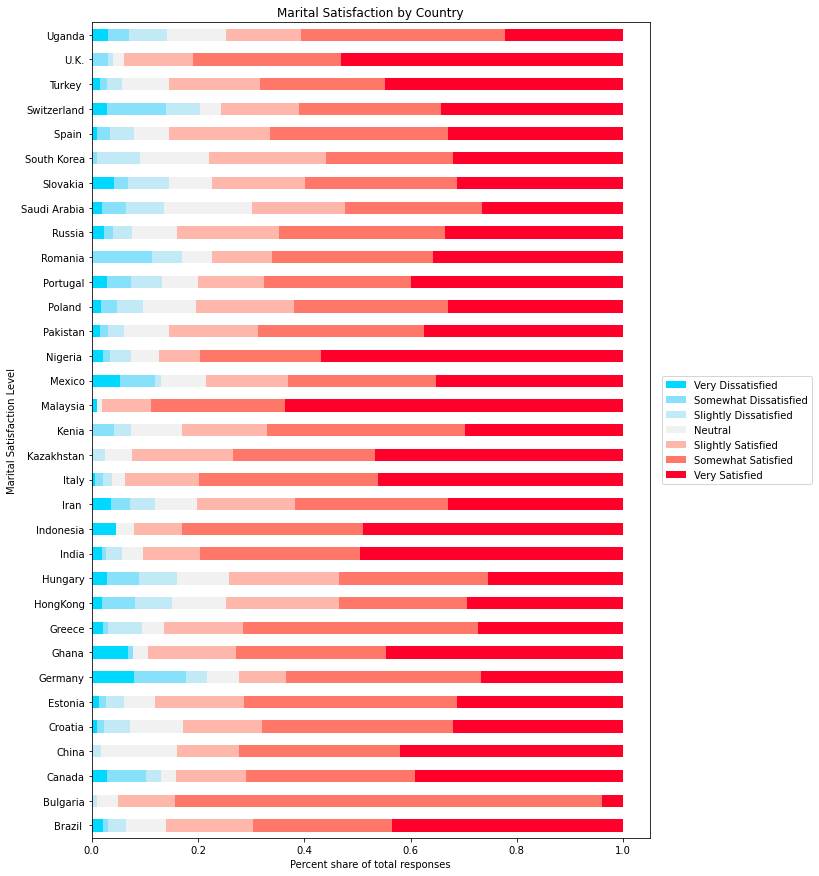

In [17]:
df = data_stackbar[['marital_satisfaction','country']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','country']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['country'], df['marital_satisfaction'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['country'], data_stackbar['marital_satisfaction'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
df = df.reindex(marsat_order, axis='columns')

print("")
print("Chi-square for Marital Satisfaction by Country:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df.plot.barh(stacked=True, figsize=(10,15), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Country')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 


Chi-square for Marital Satisfaction by Country:
p: 1.6243219793457932e-09
chi2: 167.00362362447711
DoF: 72


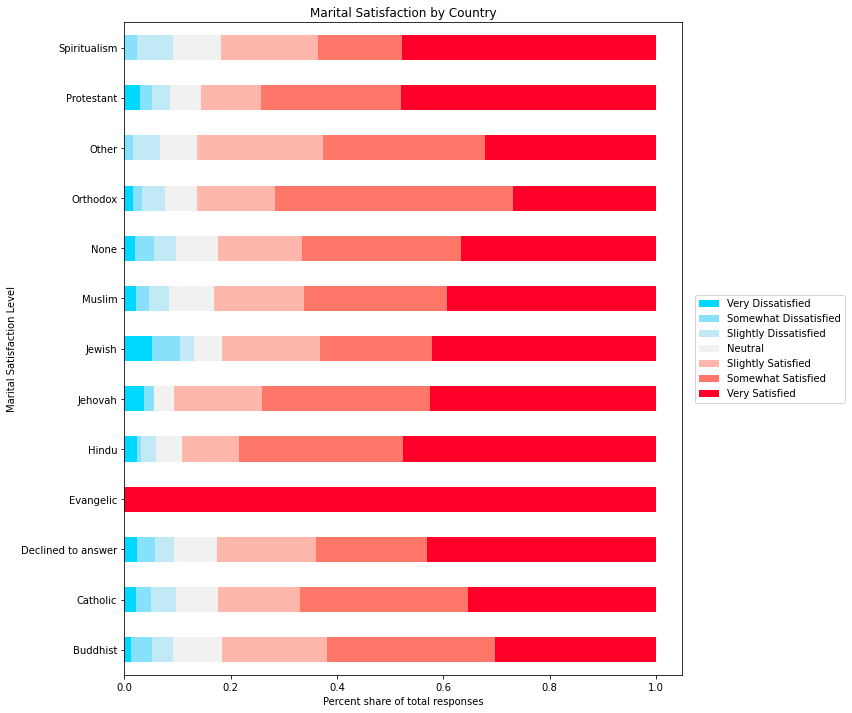

In [18]:
data_stackbar['religion'] = data_stackbar['religion'].replace({1:"Protestant",2:"Catholic",3:"Jewish",4:"Muslim",5:"Buddhist",6:"None",7:"Jehovah",8:"Evangelic",9:"Spiritualism",10:"Other",11:"Orthodox",12:"Hindu",999:"Declined to answer"})

df = data_stackbar[['marital_satisfaction','religion']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','religion']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['religion'], df['marital_satisfaction'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['religion'], data_stackbar['marital_satisfaction'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
df = df.reindex(marsat_order, axis='columns')

print("")
print("Chi-square for Marital Satisfaction by Country:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df.plot.barh(stacked=True, figsize=(10,12), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Country')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 


Chi-square for Marital Satisfaction by Country:
p: 3.5947943171817916e-11
chi2: 99.54276823298787
DoF: 24


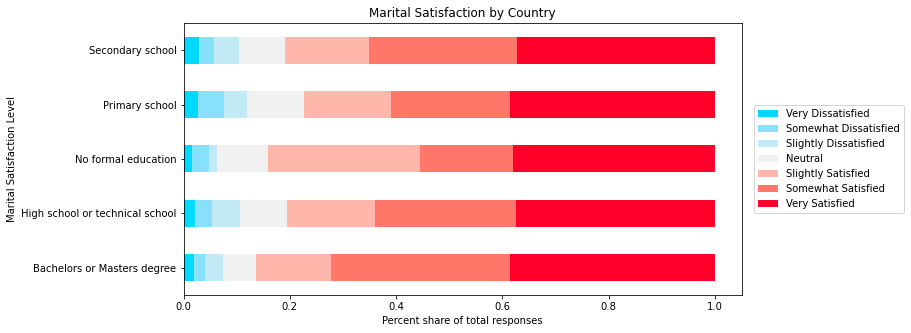

In [19]:
data_stackbar['edu_level'] = data_stackbar['edu_level'].replace({1:"No formal education",2:"Primary school",3:"Secondary school",4:"High school or technical school",5:"Bachelors or Masters degree"})
df = data_stackbar[['marital_satisfaction','edu_level']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','edu_level']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['edu_level'], df['marital_satisfaction'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['edu_level'], data_stackbar['marital_satisfaction'])
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
df = df.reindex(marsat_order, axis='columns')

print("")
print("Chi-square for Marital Satisfaction by Country:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))

df.plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Country')
plt.legend(loc='center right', bbox_to_anchor=(1.3,.5))
plt.show() 

In [20]:
ivs = [c for c in data.columns if c not in ['Unnamed: 0', 'country', 'sex', 'age', 'marriage_duration_years',
       'num_children_total', 'num_children_inhome', 'edu_level',
       'material_situation', 'religion', 'religiosity', 'marital_satisfaction']]


Chi-square for Marital Satisfaction by pension:
p: 7.557547574727078e-14
chi2: 137.90837341717634
DoF: 36
Cramer's V: pension
Strongly Disagree             25.092172
Somewhat Disagree             27.160512
Slightly Disagree             35.601675
Neither Agree nor Disagree    22.059912
Slightly Agree                16.897665
Somewhat Agree                19.400086
Strongly Agree                22.865917
dtype: float64


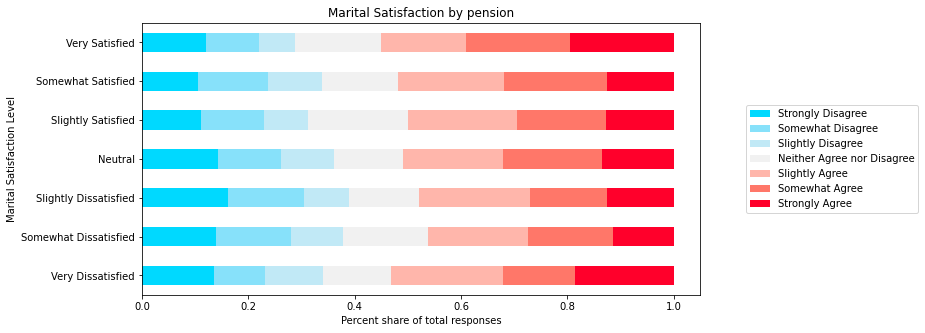


Chi-square for Marital Satisfaction by enjoy_spouse_company:
p: 0.0
chi2: 3049.4917427882224
DoF: 24
Cramer's V: enjoy_spouse_company
No                   2335.874584
Rather no            1706.554244
Neither yes or no     735.650491
Rather yes            420.775278
Yes                   225.638386
dtype: float64


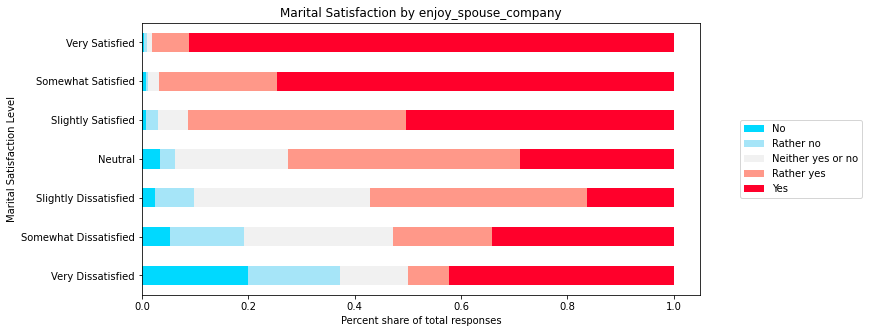


Chi-square for Marital Satisfaction by happiness:
p: 0.0
chi2: 2896.9715397842806
DoF: 24
Cramer's V: happiness
No                   2855.561774
Rather no            1281.660422
Neither yes or no     622.772954
Rather yes            320.089484
Yes                   262.813046
dtype: float64


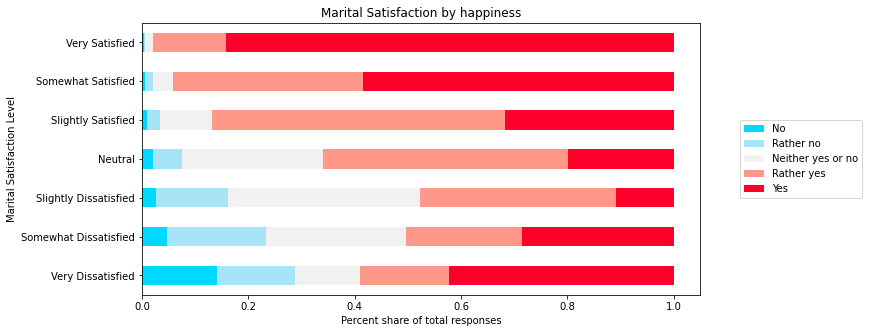


Chi-square for Marital Satisfaction by spouse_attraction:
p: 0.0
chi2: 2900.7701805688293
DoF: 24
Cramer's V: spouse_attraction
No                   2796.243924
Rather no            1350.842602
Neither yes or no     674.439683
Rather yes            355.412058
Yes                   234.832202
dtype: float64


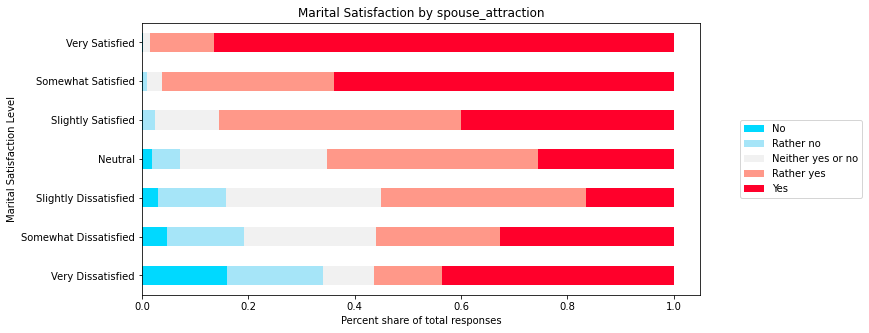


Chi-square for Marital Satisfaction by spouse_enjoy_doing_things_together:
p: 0.0
chi2: 2531.1930265720166
DoF: 24
Cramer's V: spouse_enjoy_doing_things_together
No                   1804.191500
Rather no             998.437175
Neither yes or no     677.517295
Rather yes            338.356226
Yes                   197.055786
dtype: float64


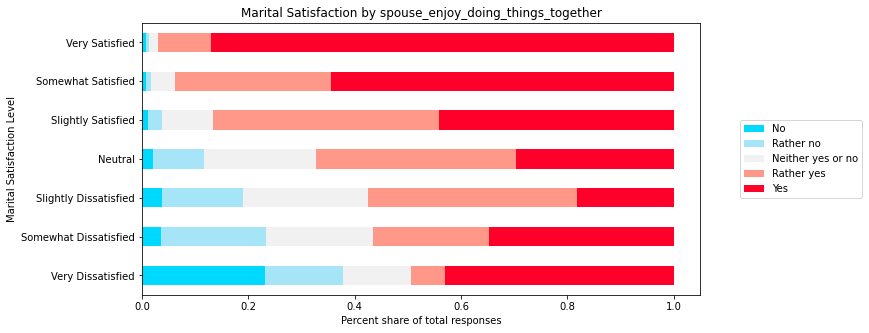


Chi-square for Marital Satisfaction by spouse_enjoy_cuddling:
p: 0.0
chi2: 2520.607937792751
DoF: 24
Cramer's V: spouse_enjoy_cuddling
No                   1578.075081
Rather no            1082.260031
Neither yes or no     650.211448
Rather yes            356.012542
Yes                   192.163405
dtype: float64


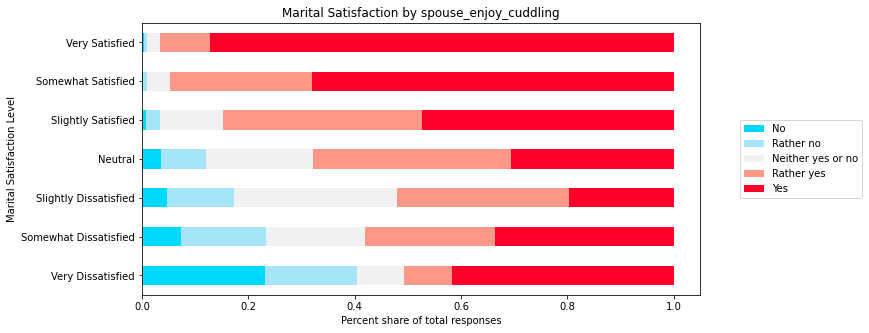


Chi-square for Marital Satisfaction by spouse_respect:
p: 0.0
chi2: 2321.0593988040396
DoF: 24
Cramer's V: spouse_respect
No                   4408.840035
Rather no            1997.597864
Neither yes or no    1018.787526
Rather yes            306.976962
Yes                   140.906469
dtype: float64


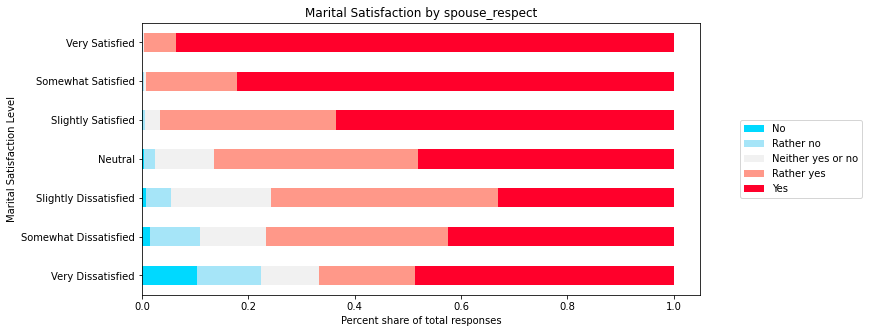


Chi-square for Marital Satisfaction by spouse_pride:
p: 0.0
chi2: 3576.224296425474
DoF: 24
Cramer's V: spouse_pride
No                   2478.137922
Rather no            1903.741200
Neither yes or no     957.257142
Rather yes            482.492451
Yes                   264.308779
dtype: float64


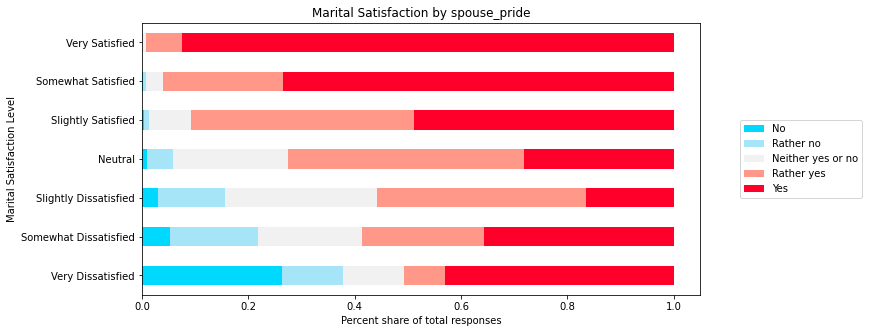


Chi-square for Marital Satisfaction by spouse_romance:
p: 0.0
chi2: 2932.201405551542
DoF: 24
Cramer's V: spouse_romance
No                   908.641819
Rather no            724.245005
Neither yes or no    582.396345
Rather yes           384.349039
Yes                  363.768373
dtype: float64


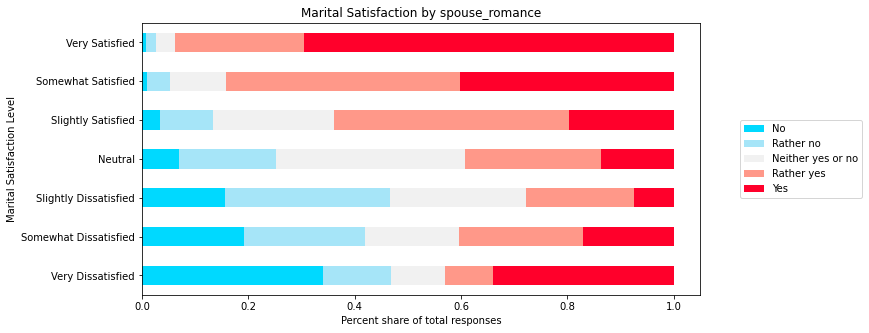


Chi-square for Marital Satisfaction by spouse_love:
p: 0.0
chi2: 2919.853897565453
DoF: 24
Cramer's V: spouse_love
No                   2266.769193
Rather no            2066.893446
Neither yes or no     879.705133
Rather yes            447.727016
Yes                   188.882449
dtype: float64


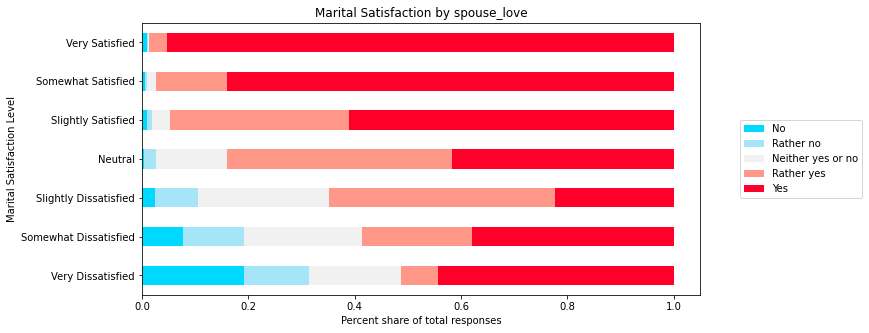


Chi-square for Marital Satisfaction by spouse_satisfaction:
p: 0.0
chi2: 18910.179751542317
DoF: 36
Cramer's V: spouse_satisfaction
Very Dissatisfied        3277.489426
Somewhat Dissatisfied    3551.905959
Slightly Dissatisfied    3714.910801
Neutral                  3474.898996
Slightly Satisfied       3088.528596
Somewhat Satisfied       2652.091188
Very Satisfied           2655.534315
dtype: float64


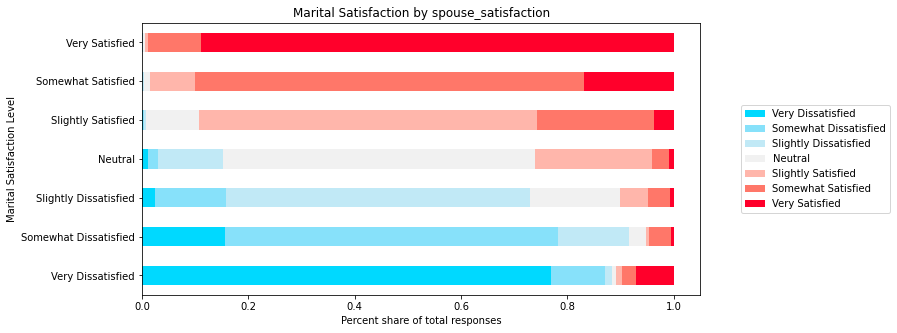


Chi-square for Marital Satisfaction by relationship_satisfaction:
p: 0.0
chi2: 17841.600712187927
DoF: 36
Cramer's V: relationship_satisfaction
Very Dissatisfied        3131.609430
Somewhat Dissatisfied    3335.621236
Slightly Dissatisfied    3222.301539
Neutral                  3411.442534
Slightly Satisfied       2842.275966
Somewhat Satisfied       2626.413137
Very Satisfied           2506.997217
dtype: float64


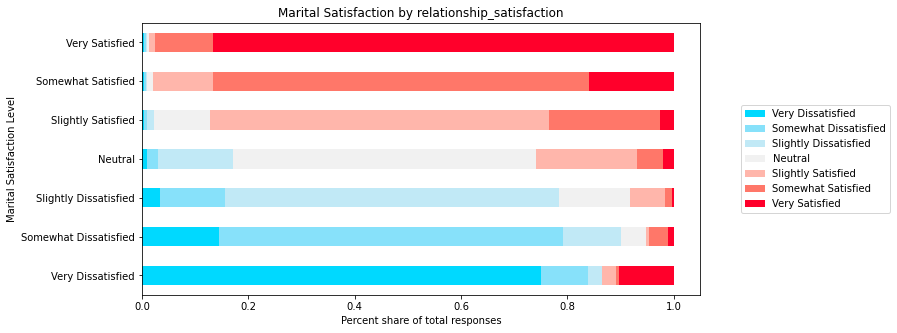


Chi-square for Marital Satisfaction by natl_pride_in_parents:
p: 2.3590848393920828e-39
chi2: 279.03051101361075
DoF: 36
Cramer's V: natl_pride_in_parents
Strongly Disagree             217.551244
Somewhat Disagree             157.303737
Slightly Disagree             118.619357
Neither Agree nor Disagree     68.583530
Slightly Agree                 31.082761
Somewhat Agree                 21.044337
Strongly Agree                 27.125673
dtype: float64


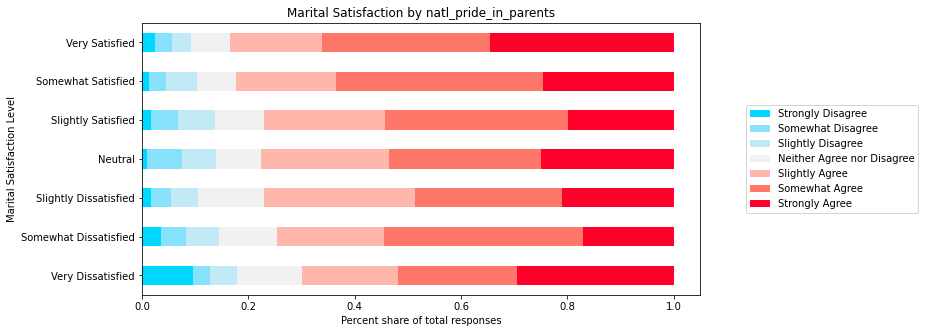


Chi-square for Marital Satisfaction by natl_pride_in_children:
p: 4.977149022849484e-10
chi2: 113.97759978665883
DoF: 36
Cramer's V: natl_pride_in_children
Strongly Disagree             103.257637
Somewhat Disagree              76.209511
Slightly Disagree              84.798892
Neither Agree nor Disagree     68.820594
Slightly Agree                 24.020547
Somewhat Agree                  9.219483
Strongly Agree                  5.907822
dtype: float64


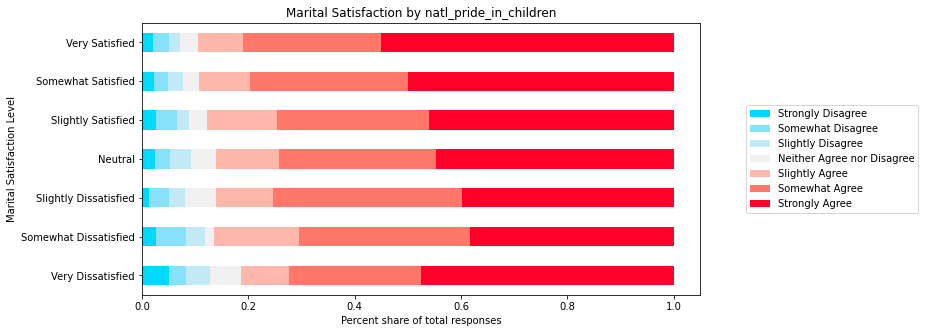


Chi-square for Marital Satisfaction by natl_aging_parents_live_with_children:
p: 2.8164345624101914e-11
chi2: 121.97575414428734
DoF: 36
Cramer's V: natl_aging_parents_live_with_children
Strongly Disagree             41.651630
Somewhat Disagree             20.365557
Slightly Disagree             22.632878
Neither Agree nor Disagree    22.630736
Slightly Agree                14.163133
Somewhat Agree                14.457025
Strongly Agree                23.216950
dtype: float64


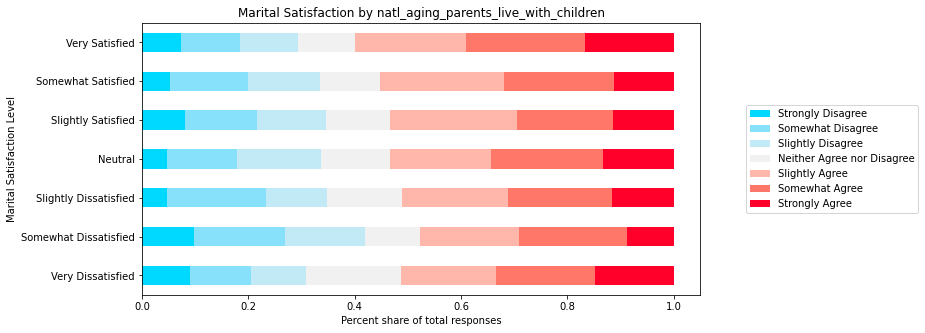


Chi-square for Marital Satisfaction by natl_children_live_at_home_marraige:
p: 7.746207364474248e-11
chi2: 119.18149764554734
DoF: 36
Cramer's V: natl_children_live_at_home_marraige
Strongly Disagree             66.033271
Somewhat Disagree             35.534583
Slightly Disagree             33.715887
Neither Agree nor Disagree    43.271890
Slightly Agree                17.738372
Somewhat Agree                 9.731819
Strongly Agree                10.286135
dtype: float64


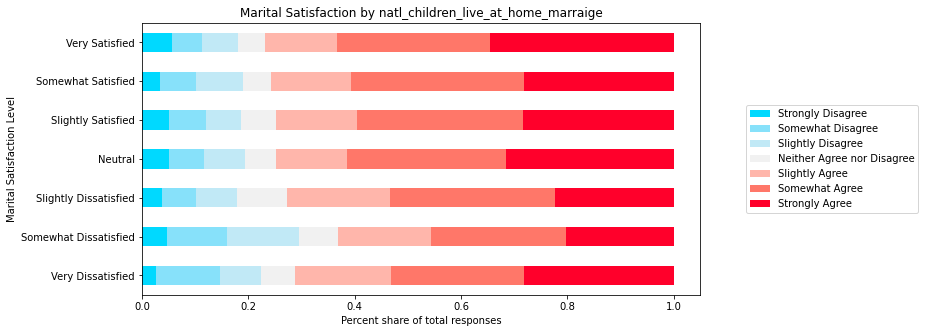


Chi-square for Marital Satisfaction by indv_pride_in_parents:
p: 4.441822190576466e-18
chi2: 162.97647458803215
DoF: 36
Cramer's V: indv_pride_in_parents
Strongly Disagree             129.130354
Somewhat Disagree             144.410428
Slightly Disagree              98.241220
Neither Agree nor Disagree     45.600355
Slightly Agree                 27.235805
Somewhat Agree                 13.368781
Strongly Agree                 10.059259
dtype: float64


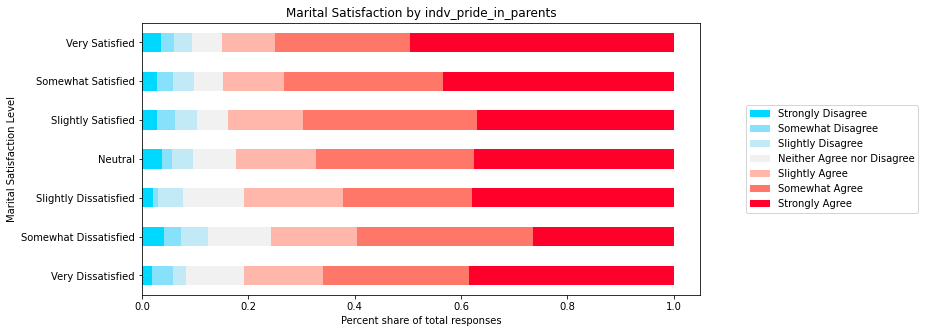


Chi-square for Marital Satisfaction by indv_pride_in_children:
p: 8.596870426426308e-15
chi2: 143.60818193017613
DoF: 36
Cramer's V: indv_pride_in_children
Strongly Disagree              90.716309
Somewhat Disagree             124.965932
Slightly Disagree             141.727506
Neither Agree nor Disagree     85.278025
Slightly Agree                 35.651753
Somewhat Agree                 13.531624
Strongly Agree                  6.548588
dtype: float64


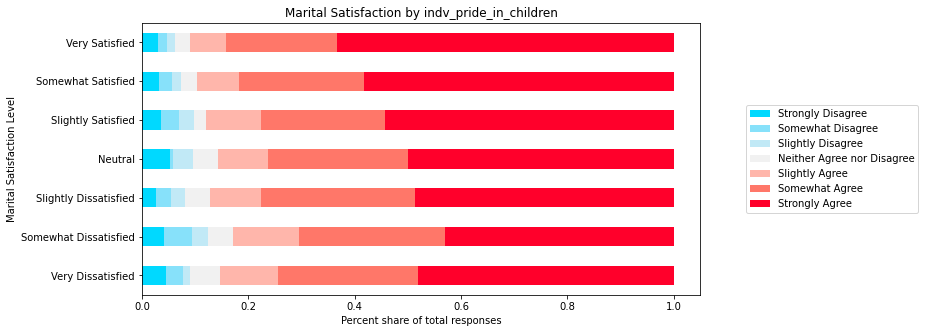


Chi-square for Marital Satisfaction by indv_aging_parents_live_with_children:
p: 1.0385810908569069e-11
chi2: 124.70835350859709
DoF: 36
Cramer's V: indv_aging_parents_live_with_children
Strongly Disagree             34.464664
Somewhat Disagree             26.293679
Slightly Disagree             26.439551
Neither Agree nor Disagree    20.745601
Slightly Agree                18.000657
Somewhat Agree                15.998007
Strongly Agree                15.231790
dtype: float64


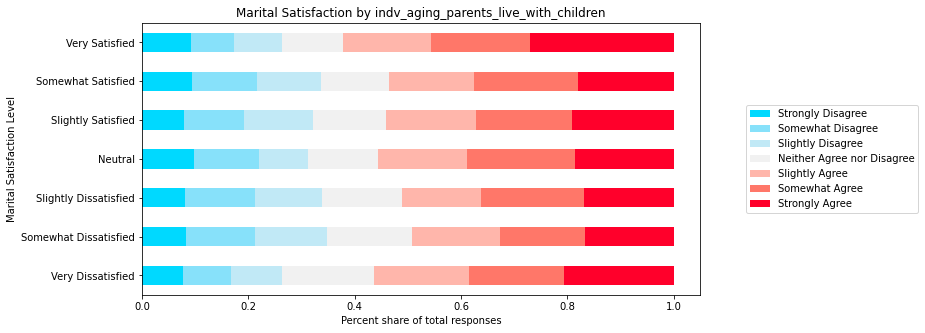


Chi-square for Marital Satisfaction by indv_children_live_at_home_marraige:
p: 2.0310580777863064e-14
chi2: 141.36217774645266
DoF: 36
Cramer's V: indv_children_live_at_home_marraige
Strongly Disagree             47.381151
Somewhat Disagree             35.259863
Slightly Disagree             38.630702
Neither Agree nor Disagree    32.681392
Slightly Agree                21.184471
Somewhat Agree                15.370751
Strongly Agree                12.675033
dtype: float64


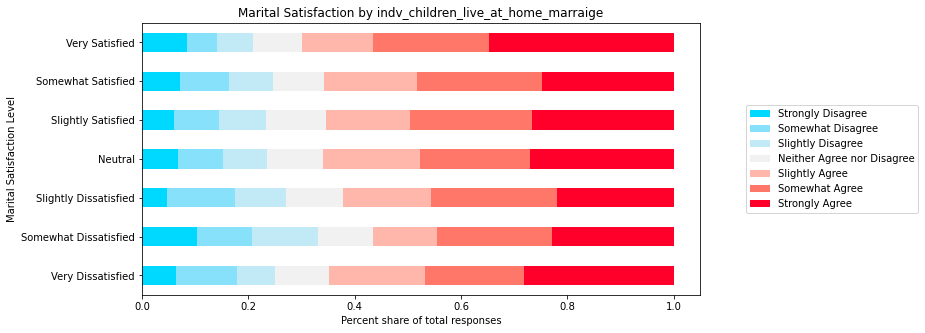

In [21]:
# 100% stacked bars of all survey questions vs target variable

for i in ivs:
  
    if len(data_stackbar[i].unique()) == 5:

        df = data_stackbar[['marital_satisfaction',i]]
        df = pd.DataFrame(df.groupby(['marital_satisfaction',i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df = pd.crosstab(df['marital_satisfaction'], df[i], values=df['count'], aggfunc='sum', normalize='index')
        ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar[i])
        df = df.reindex(marsat_order, axis='rows')
        df = df.reindex(mrq_order, axis='columns')
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        n = np.sum(df)
        m = min(ct.shape)-1
        cramersv = (stat/(n*m))
        print("")
        print("Chi-square for Marital Satisfaction by " + i + ":")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        print("Cramer's V: " + str(cramersv))
        df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#a6e5f8','#f1f1f1','#ff9889','#ff002b'))
        plt.ylabel('Marital Satisfaction Level')
        plt.xlabel('Percent share of total responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(mrq_responses, loc='center right', bbox_to_anchor=(1.3,.5))
        plt.show()        
        
    elif len(data_stackbar[i].unique()) == 7 and np.sort(data_stackbar['marital_satisfaction'].unique()).all() == np.sort(data_stackbar[i].unique()).all():
        df = data_stackbar[['marital_satisfaction',i]]
        df = pd.DataFrame(df.groupby(['marital_satisfaction',i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df = pd.crosstab(df['marital_satisfaction'], df[i], values=df['count'], aggfunc='sum', normalize='index')
        ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar[i])
        df = df.reindex(marsat_order, axis='rows')
        df = df.reindex(marsat_order, axis='columns')
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        n = np.sum(df)
        m = min(ct.shape)-1
        cramersv = (stat/(n*m))
        print("")
        print("Chi-square for Marital Satisfaction by " + i + ":")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        print("Cramer's V: " + str(cramersv))
        df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
        plt.ylabel('Marital Satisfaction Level')
        plt.xlabel('Percent share of total responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(marsat_responses, loc='center right', bbox_to_anchor=(1.35,.5))
        plt.show()

    elif len(data_stackbar[i].unique()) == 7 and np.sort(data_stackbar['marital_satisfaction'].unique()).all() != np.sort(data_stackbar[i].unique()).all():
        df = data_stackbar[['marital_satisfaction',i]]
        df = pd.DataFrame(df.groupby(['marital_satisfaction',i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df = pd.crosstab(df['marital_satisfaction'], df[i], values=df['count'], aggfunc='sum', normalize='index')
        ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar[i])
        df = df.reindex(marsat_order, axis='rows')
        df = df.reindex(gs_order, axis='columns')
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        n = np.sum(df)
        m = min(ct.shape)-1
        cramersv = (stat/(n*m))
        print("")
        print("Chi-square for Marital Satisfaction by " + i + ":")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        print("Cramer's V: " + str(cramersv))
        df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
        plt.ylabel('Marital Satisfaction Level')
        plt.xlabel('Percent share of total responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(gs_responses, loc='center right', bbox_to_anchor=(1.4,.5))
        plt.show()



Chi-square for Marital Satisfaction by Religiosity:
p: 5.2935732827837806e-27
chi2: 213.06776940948853
DoF: 36
Cramer's V: religiosity
Extremely               55.594752
Somewhat religious      50.599243
Slightly religious      35.473332
Moderately              15.785799
Slightly irreligious    44.856346
Somewhat irreligious    65.584573
Not at all              33.013339
dtype: float64


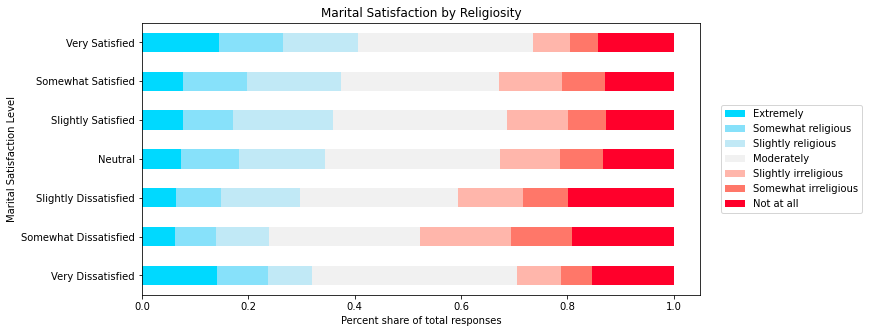

In [22]:
data_stackbar['religiosity'] = data_stackbar['religiosity'].replace({1:"Not at all",2:"Somewhat irreligious",3:"Slightly irreligious",4:"Moderately", 5:"Slightly religious",6:"Somewhat religious",7:"Extremely"})
rel_order = ["Extremely","Somewhat religious","Slightly religious","Moderately","Slightly irreligious","Somewhat irreligious","Not at all"]
rel_responses = ["Extremely","Somewhat religious","Slightly religious","Moderately","Slightly irreligious","Somewhat irreligious","Not at all"]

df = data_stackbar[['marital_satisfaction','religiosity']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','religiosity']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['marital_satisfaction'], df['religiosity'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar['religiosity'])
df = df.reindex(marsat_order, axis='rows')
df = df.reindex(rel_order, axis='columns')
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
n = np.sum(df)
m = min(ct.shape)-1
cramersv = (stat/(n*m))
print("")
print("Chi-square for Marital Satisfaction by Religiosity:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
print("Cramer's V: " + str(cramersv))
df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#87e1fa','#c1e9f6','#f1f1f1','#ffb6ab','#ff7769','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Religiosity')
plt.legend(rel_responses, loc='center right', bbox_to_anchor=(1.3,.5))
plt.show()


Chi-square for Marital Satisfaction by Material Situation:
p: 1.8120278203221395e-48
chi2: 294.86254569049385
DoF: 24
Cramer's V: material_situation
Much worse than average     507.891452
Worse than average           81.903810
Average                      20.687315
Better than average          40.990867
Much better than average    124.275270
dtype: float64


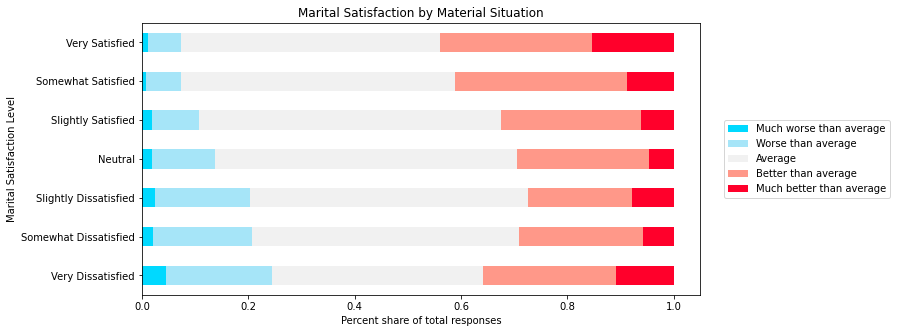

In [23]:
data_stackbar['material_situation'] = data_stackbar['material_situation'].replace({2:"Much better than average",1:"Better than average",0:"Average",-1:"Worse than average",-2:"Much worse than average"})
matsit_order = ["Much worse than average","Worse than average","Average","Better than average","Much better than average"]
matsit_responses = ["Much worse than average","Worse than average","Average","Better than average","Much better than average"]

df = data_stackbar[['marital_satisfaction','material_situation']]
df = pd.DataFrame(df.groupby(['marital_satisfaction','material_situation']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = pd.crosstab(df['marital_satisfaction'], df['material_situation'], values=df['count'], aggfunc='sum', normalize='index')
ct = pd.crosstab(data_stackbar['marital_satisfaction'], data_stackbar['material_situation'], rownames=None, colnames=None)
df = df.reindex(marsat_order, axis='rows')
df = df.reindex(matsit_order, axis='columns')
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
n = np.sum(df)
m = min(ct.shape)-1
cramersv = (stat/(n*m))
print("")
print("Chi-square for Marital Satisfaction by Material Situation:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
print("Cramer's V: " + str(cramersv))
df.loc[marsat_responses].plot.barh(stacked=True, figsize=(10,5), color=('#00d9ff','#a6e5f8','#f1f1f1','#ff9889','#ff002b'))
plt.ylabel('Marital Satisfaction Level')
plt.xlabel('Percent share of total responses')
plt.title('Marital Satisfaction by Material Situation')
plt.legend(matsit_responses, loc='center right', bbox_to_anchor=(1.35,.5))
plt.show()

In [24]:
# effect size
# viz for cont data